Link dataset: https://www.kaggle.com/c/titanic/data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Input data

In [3]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [7]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [8]:
df = df.drop('Cabin', axis=1)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- Data Titanic ini sudah tidak mengandung NaN atau nilai kosong lagi sehingga dapat dilanjutkan ke proses selanjutnya.

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Feature Engineering

## Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


- Mengubah tipe data Sex menjadi berbentuk angka agar mendapatkan insight yang lebih baik untuk digunakan di dalam model.
- Mengubah tipe data Embarked menjadi berbentuk angka agar mendapatkan insight yang lebih baik untuk digunakan di dalam model.

## Outlier Checking

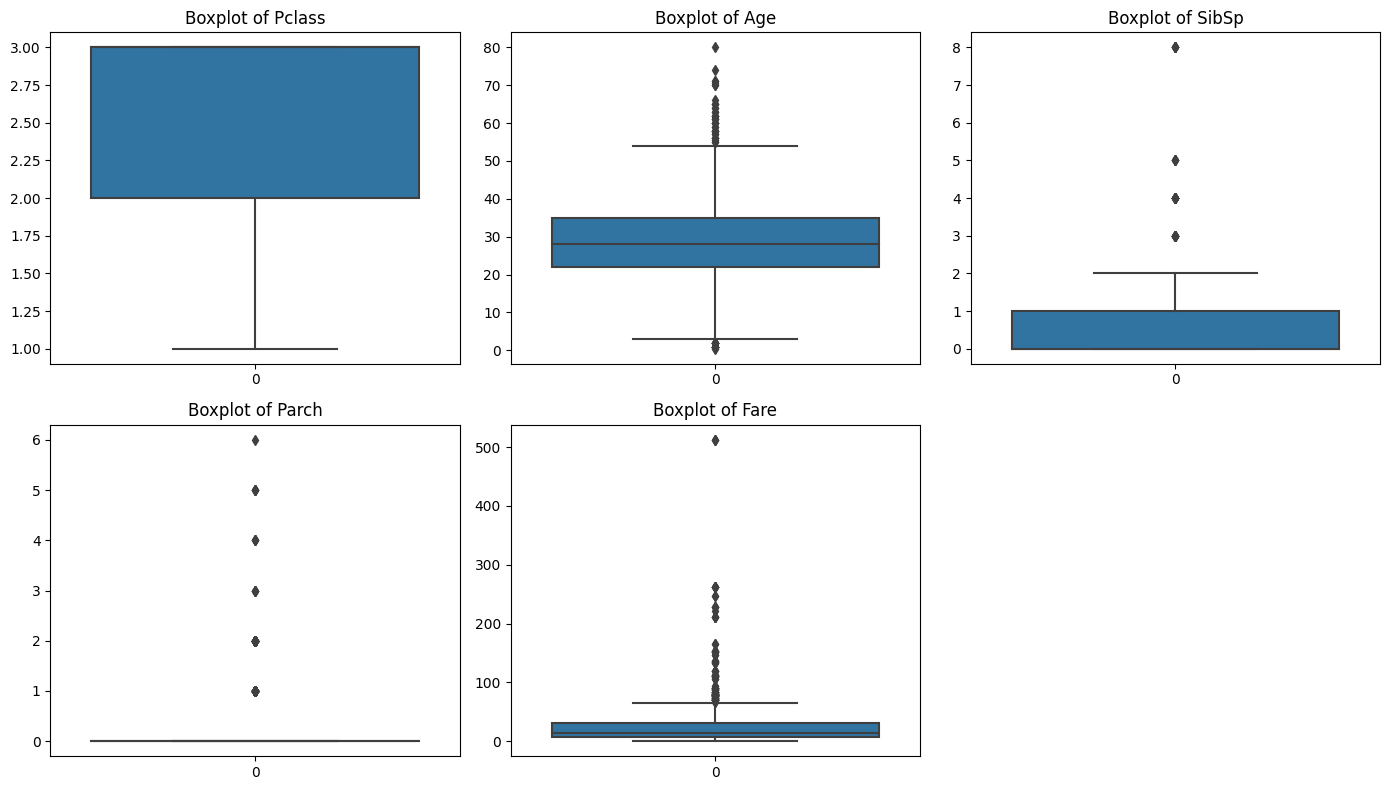

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom yang ingin divisualisasikan outliernya (numerik kontinu saja)
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Visualisasi menggunakan boxplot untuk setiap fitur
plt.figure(figsize=(14, 8))

# Loop untuk membuat subplot boxplot per fitur
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(data=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


Peneliti merasa outlier dalam data ini adalah hal yang penting dikarenakan menyimpan beberapa informasi yang berguna untuk pemodelan dan analisis selanjutnya, sehingga peneliti merasa tidak perlu menghilangkan outlier.

# Exploratory Data Analysis

In [16]:
new = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' ]

data = df[new]


Tabel Korelasi antara Fitur dan 'Survived':
    Feature  Correlation with Survived
1      Fare                   0.257307
2     Parch                   0.081629
3     SibSp                  -0.035322
4       Age                  -0.064910
5  Embarked                  -0.167675
6    Pclass                  -0.338481
7       Sex                  -0.543351


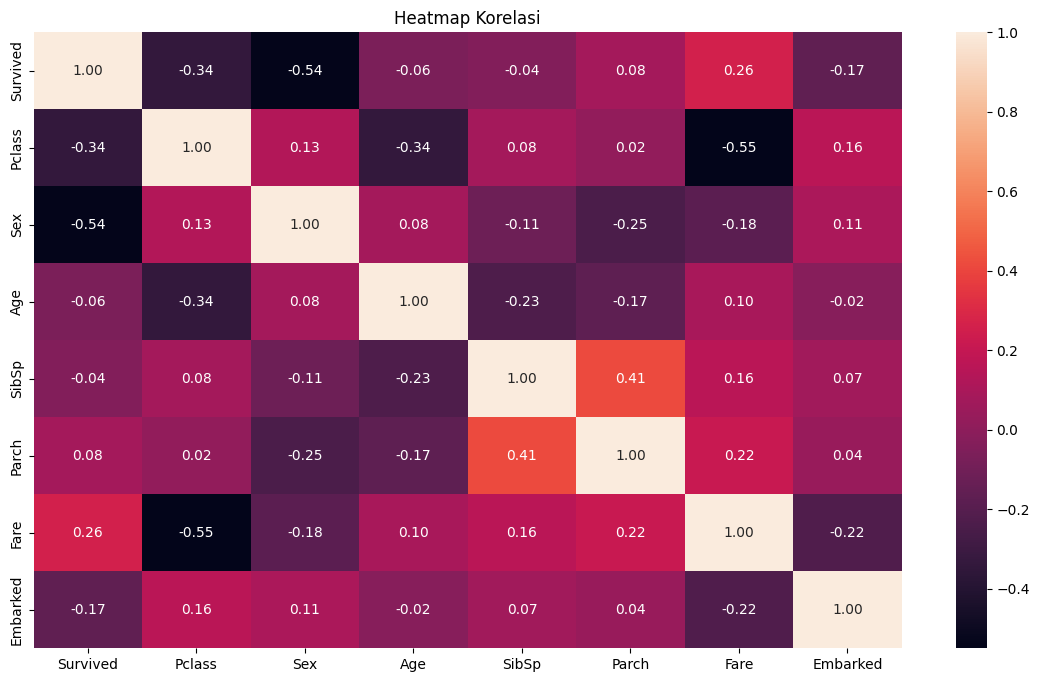

In [17]:
# Menghitung korelasi antara fitur dan 'Survived'
correlation = data.corr()['Survived'].drop('Survived')

# Membuat dataframe untuk menyimpan fitur dan nilai korelasi
df_correlation = pd.DataFrame(correlation).reset_index()
df_correlation.columns = ['Feature', 'Correlation with Survived']

# Mengurutkan dataframe berdasarkan nilai korelasi dari yang tertinggi ke terendah
df_correlation = df_correlation.sort_values(by='Correlation with Survived', ascending=False).reset_index(drop=True)

# Mengatur indeks mulai dari 1
df_correlation.index += 1

print("Tabel Korelasi antara Fitur dan 'Survived':")
print(df_correlation)

# Menampilkan heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

Dari hasil korelasi tersebut bisa dilihat bahwa:
- Fare adalah fitur yang berpengaruh positif pada Survived, artinya semakin tinggi biaya tiket maka chance untuk selamat akan meningkat. Begitu juga dengan Parch yang berpengaruh positif pada Survived yang artinya jika penumpang membawa keluarga ke dalam kapal maka chance untuk selamat juga semakin meningkat.
- Pclass, Sex, Age, SibSp, dan Embarked adalah fitur-fitur yang berpengaruh negatif pada Survived. Artinya adalah sebagai berikut:
1. Semakin banyak jumlah saudara dan pasangan yang dibawa ke kapal (SibSp) oleh tiap penumpang, maka chance untuk selamat akan menurun begitu juga sebaliknya.
2. Semakin tua usia seorang penumpang maka chance selamat akan menurun.
3. Semakin tinggi tingkat kelas dari penumpang, maka semakin rendah chance untuk selamat.

## Analisis Univariat

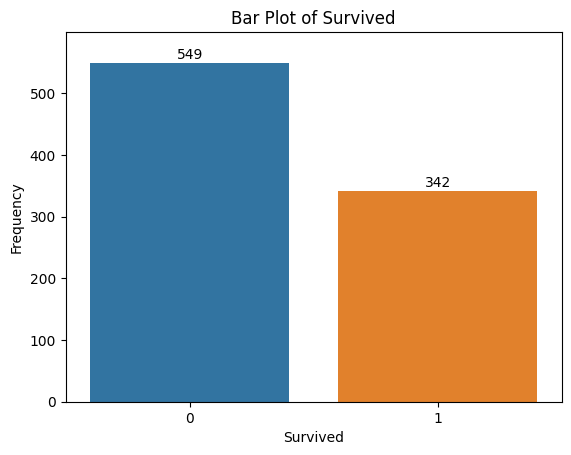

In [18]:
Survived_counts = data['Survived'].value_counts().reset_index()
Survived_counts.columns = ['Survived', 'Frequency']

ax = sns.barplot(data=Survived_counts, x='Survived', y='Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Bar Plot of Survived')


for index, row in Survived_counts.iterrows():
    ax.text(row['Survived'], row['Frequency'] + 2,  
            round(row['Frequency'], 2), 
            color='black', ha='center', va='bottom')


plt.ylim(0, Survived_counts['Frequency'].max() + 50) 

plt.show()


Menurut hasil visualisasi di atas, terdapat 549 penumpang yang tidak selamat dan 342 penumpang yang selamat yang artinya lebih banyak penumpang tidak selamat daripada penumpang yang selamat.

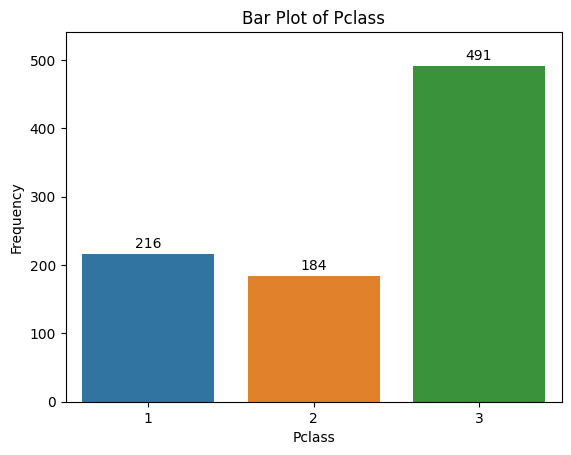

In [19]:
pclass_counts = data['Pclass'].value_counts().reset_index()
pclass_counts.columns = ['Pclass', 'Frequency']


ax = sns.barplot(data=pclass_counts, x='Pclass', y='Frequency')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title('Bar Plot of Pclass')


for index, row in pclass_counts.iterrows():
    ax.text(row['Pclass'] - 1, row['Frequency'] + 5,  
            round(row['Frequency'], 2), 
            color='black', ha='center', va='bottom')


plt.ylim(0, pclass_counts['Frequency'].max() + 50)  

plt.show()


Ada jumlah penumpang sebanyak 216 orang yang berada di kelas 1, 184 orang di kelas 2, dan 491 orang di kelas 3.

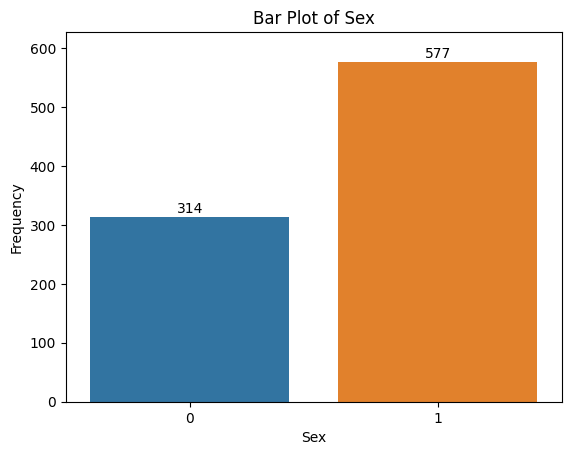

In [20]:
Sex_counts = data['Sex'].value_counts().reset_index()
Sex_counts.columns = ['Sex', 'Frequency']

ax = sns.barplot(data=Sex_counts, x='Sex', y='Frequency')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Bar Plot of Sex')


for index, row in Sex_counts.iterrows():
    ax.text(row['Sex'], row['Frequency'] + 2,  
            round(row['Frequency'], 2), 
            color='black', ha='center', va='bottom')


plt.ylim(0, Sex_counts['Frequency'].max() + 50) 

plt.show()


Dari fitur Sex di atas kita dapat mengetahui bahwa terdapat 314 penumpang wanita dan 577 penumpang laki-laki.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


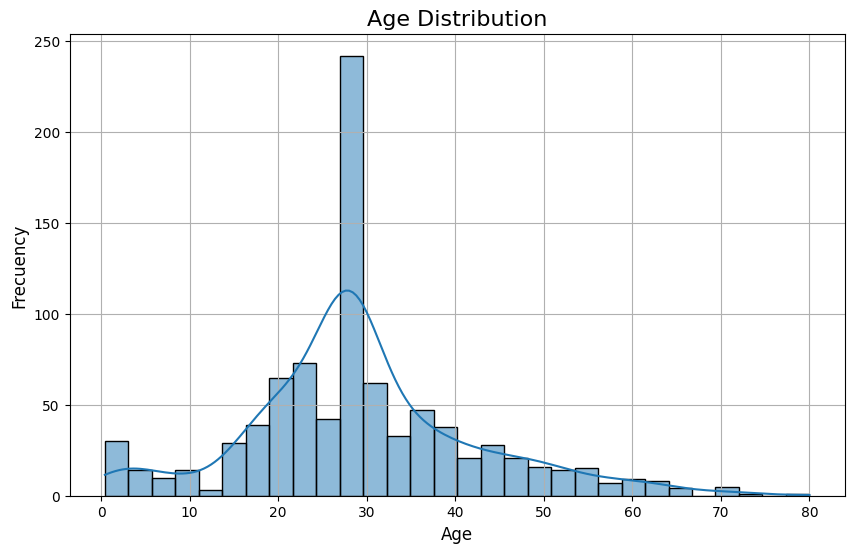

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [21]:
plt.figure(figsize=(10, 6))

# Plot distribusi
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frecuency', fontsize=12)
plt.grid(True)
plt.show()

# Statistik deskriptif untuk kolom 'Age'
age_stats = data['Age'].describe()
print(age_stats)


Hasil analisis dari visualisasi distribusi data di atas adalah sebagai berikut:
1. Dari jumlah total 891 penumpang, usia termuda adalah 0.42 tahun dan usia tertua adalah 80 tahun.
2. Rata-rata usia penumpang adalah 29 tahun dengan standar deviasinya adalah 13 artinya standar deviasi lebih kecil daripada rata-rata yang menandakan data bersifat cenderung homogen dan mengandung lebih sedikit outlier.
3. Jumlah penumpang terbanyak adalah pada rentang sekitar 20-30 tahun.

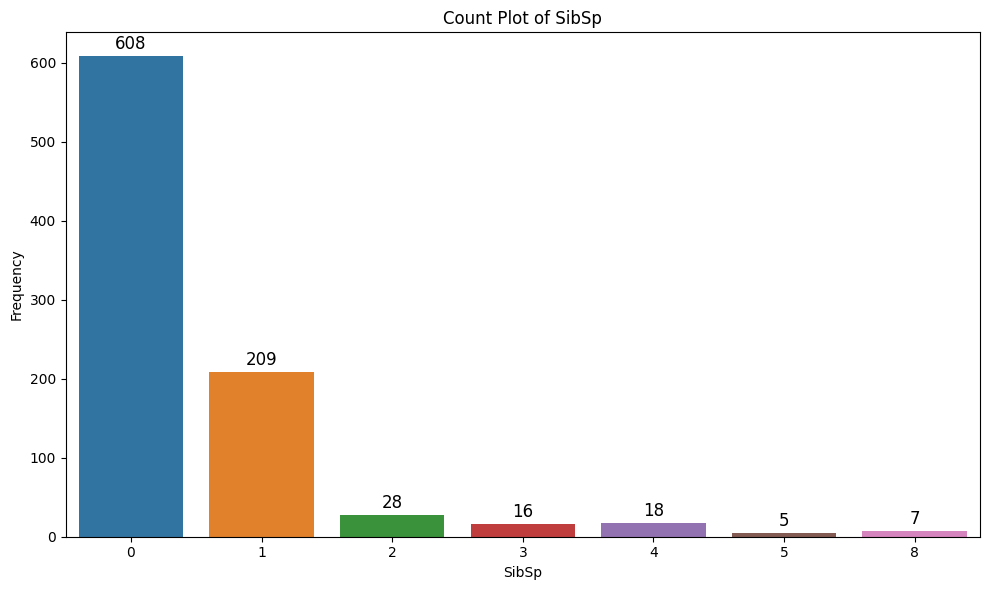

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SibSp', data=data)
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.title('Count Plot of SibSp')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5),  
                textcoords='offset points')


plt.tight_layout()

plt.show()


Hasil visualisasi di atas menunjukkan bahwa terdapat 608 penumpang tidak punya atau tidak membawa pasangan/saudara ke dalam kapal dan terdapat 209 penumpang membawa 1 pasangan/saudara dan sisa penumpang lainnya membawa lebih dari 1 pasangan/saudara jumlahnya sebanyak 74 orang.

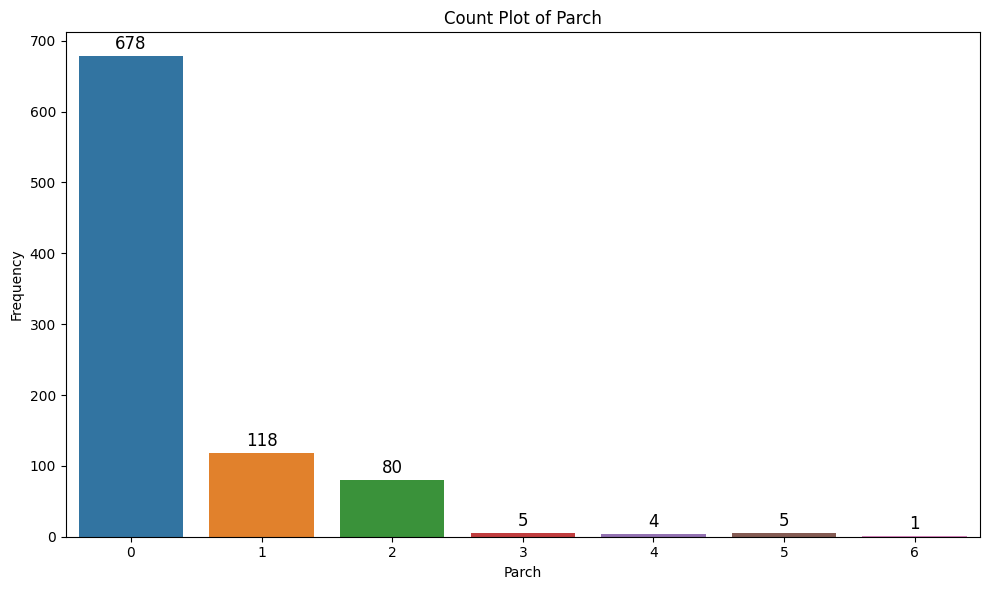

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Parch', data=data)
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.title('Count Plot of Parch')


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5),  
                textcoords='offset points')


plt.tight_layout()

plt.show()


Hasil visualisasi di atas menunjukkan bahwa terdapat 678 penumpang tidak punya atau tidak membawa orang tua/anak-anak ke dalam kapal dan terdapat 118 penumpang membawa 1 orang tua/anak-anak, 80 penumpang membawa 2 orang tua/anak-anak dan sisa penumpang lainnya membawa lebih dari 2 pasangan/saudara jumlahnya sebanyak 15 orang.

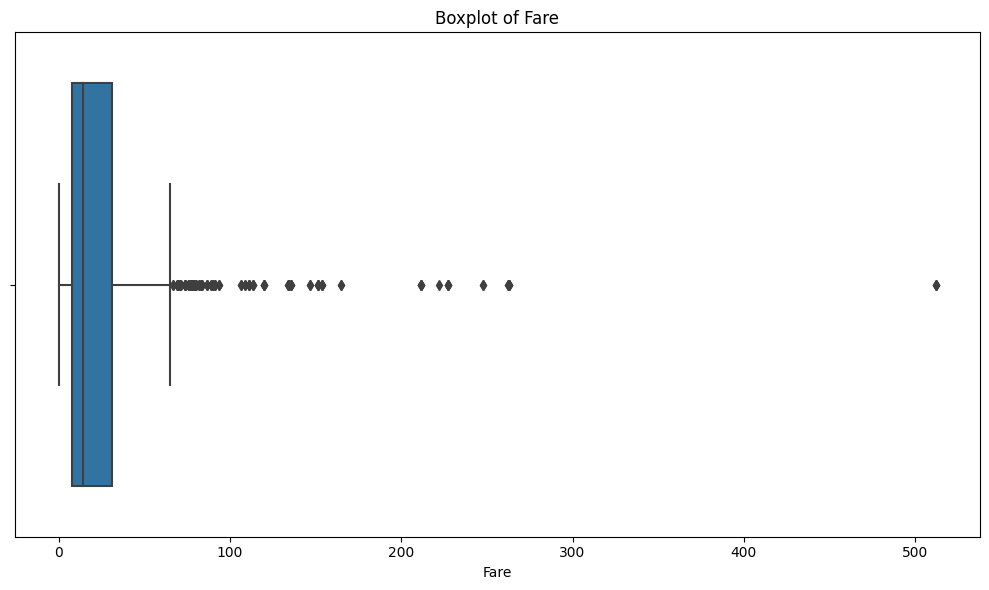

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fare', data=data)
plt.xlabel('Fare')
plt.title('Boxplot of Fare')
plt.tight_layout()
plt.show()


Distribusi di atas menunjukkan bahwa mayoritas penumpang membayar tiket dengan harga kurang dari 100 dan terdapat beberapa outliers seperti di kisaran 100-300 dan di data ini memiliki nilai outlier yang ekstrem dikarenakan terdapat sejumlah penumpang yang membayar harga tiket lebih dari 500.

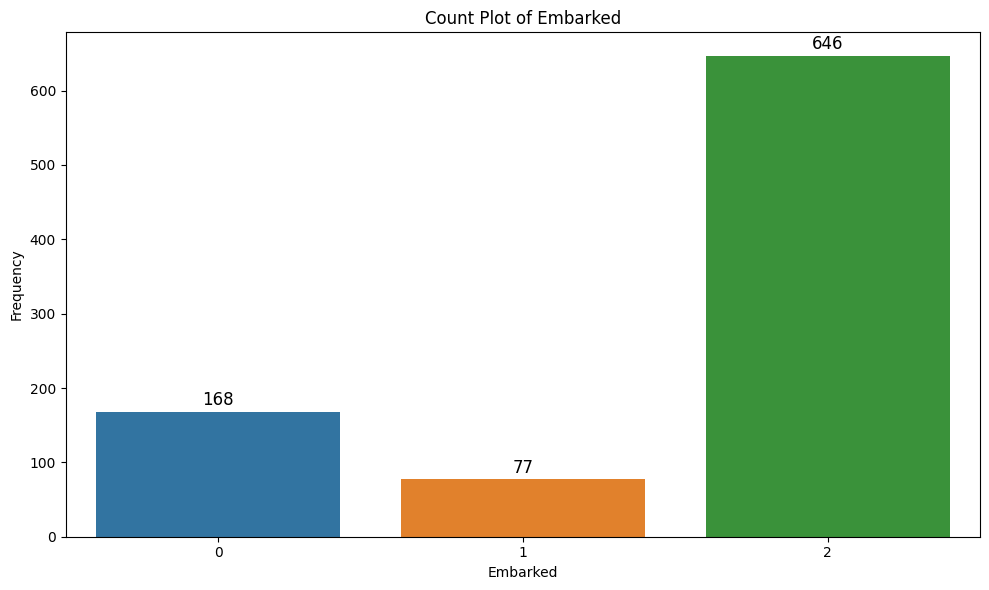

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Embarked', data=data)
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.title('Count Plot of Embarked')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5),  
                textcoords='offset points')


plt.tight_layout()

plt.show()


Ada sebanyak 168 orang yang memilih tujuan Cherbourg, 77 orang memilih tujuan Queenstown dan yang terbanyak adalah tujuan Southampton dengan 646 penumpang memilih tujuan tersebut.

## Analisis Bivariat

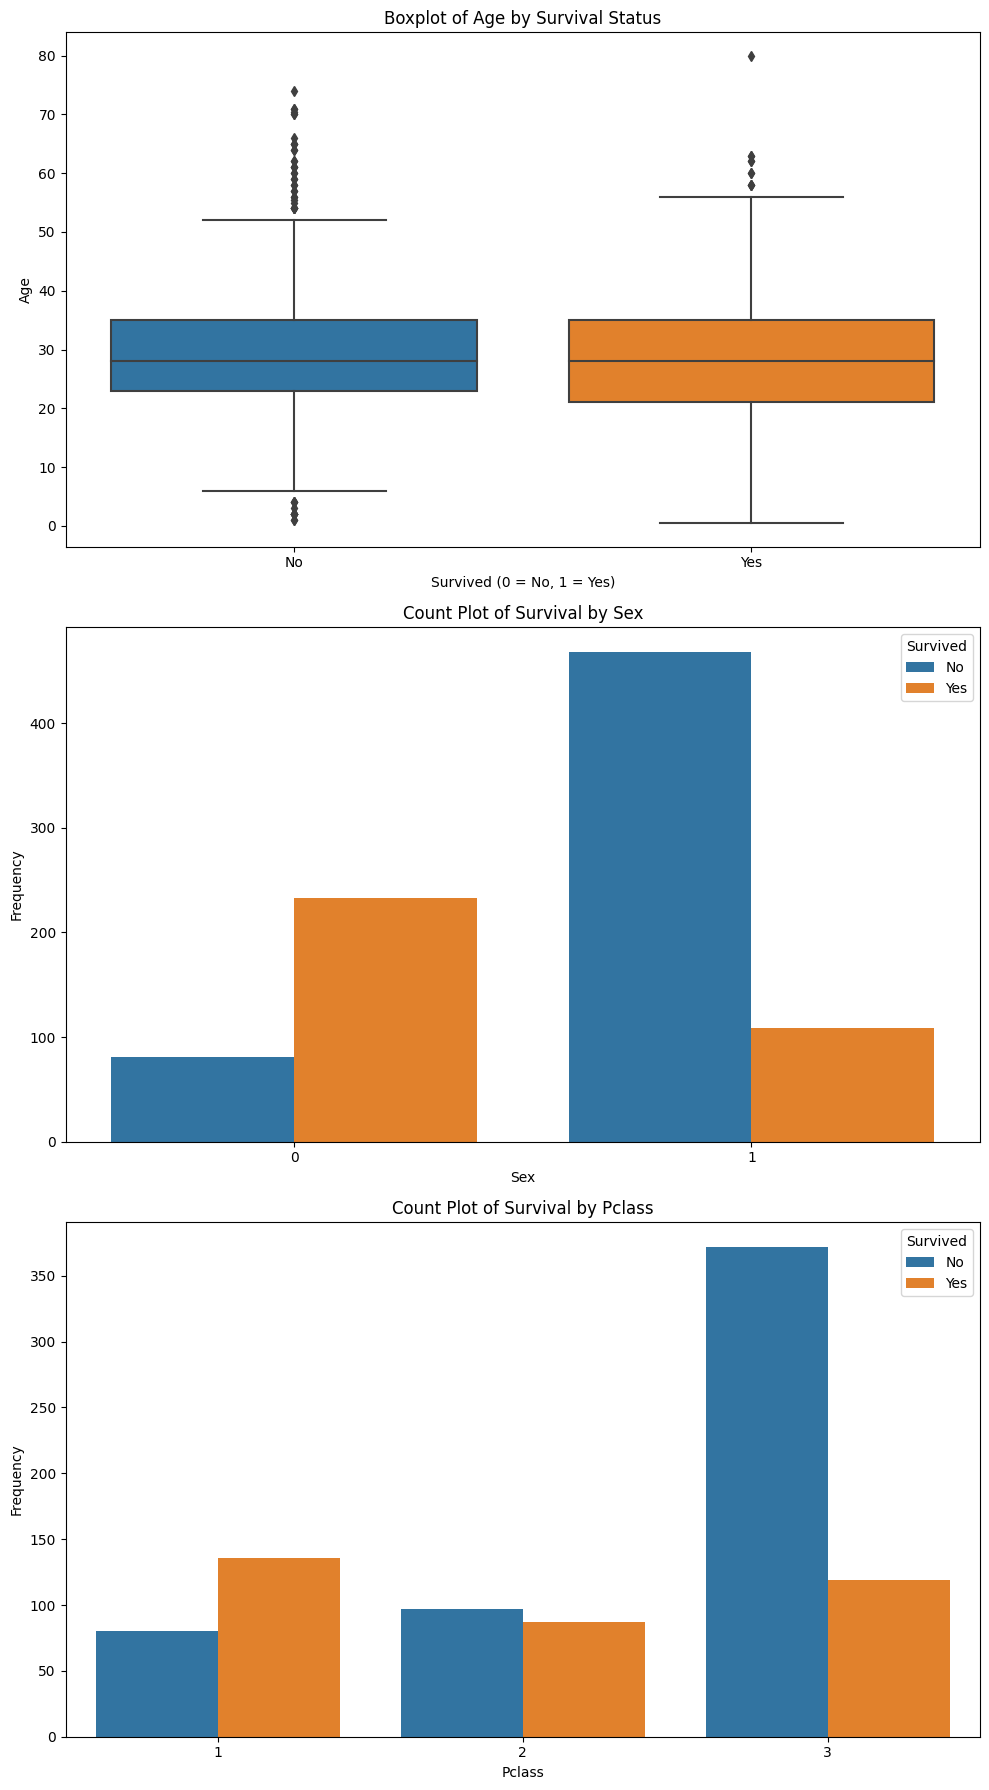

In [76]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# 1. Boxplot untuk Survived vs Age
sns.boxplot(x='Survived', y='Age', data=data, ax=axs[0])
axs[0].set_xlabel('Survived (0 = No, 1 = Yes)')
axs[0].set_ylabel('Age')
axs[0].set_title('Boxplot of Age by Survival Status')
axs[0].set_xticklabels(['No', 'Yes'])

# 2. Countplot untuk Survived vs Sex
sns.countplot(x='Sex', hue='Survived', data=data, ax=axs[1])
axs[1].set_xlabel('Sex')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Count Plot of Survival by Sex')
axs[1].legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

# 3. Countplot untuk Survived vs Pclass
sns.countplot(x='Pclass', hue='Survived', data=data, ax=axs[2])
axs[2].set_xlabel('Pclass')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Count Plot of Survival by Pclass')
axs[2].legend(title='Survived', loc='upper right', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()


Dari hasil visualisasi 3 variabel yaitu Age, Sex, dan Pclass terhadap Survived didapat hasil analisis sebagai berikut:
1. Di bagian Age-Survived, meskipun rentang IQR, maximum (Q3-1.5 * IQR), dan minimum (Q1 - 1.5 * IQR) dari kedua boxplot relatif sama, terdapat perbedaan yang signifikan pada bagian Age terhadap Survived 0 (tidak selamat). Di bagian itu memiliki lebih banyak outliers dibanding Age terhadap Survived 1 (selamat) artinya lebih banyak orang berusia lebih tua tidak selamat pada tragedi Titanic tersebut.
2. Pada bagian Sex-Survived, terdapat lebih banyak wanita yang selamat daripada yang tidak selamat sedangkan untuk pria terdapat lebih banyak pria yang tidak selamat daripada yang tidak selamat.
3. Dilihat dari hasil Pclass-Survived, pada kelas 1 lebih banyak penumpang kapal yang selamat dibanding yang tidak selamat. Hal berbeda ditunjukkan oleh kelas 2 dan 3 di mana kelas 2 memiliki jumlah penumpang selamat lebih sedikit daripada yang tidak selamat dan kasus kematian tertinggi terdapat pada kelas 3 yang memiliki jauh lebih banyak penumpang tidak selamat daripada yang selamat.

Insights yang mungkin bisa diberikan adalah sebagai berikut:
1. Sesuai pada boxplot Age-Survived, masukan yang dapat diberikan adalah memberikan keamanan dan pelayanan ekstra pada penumpang yang usianya lebih dari 50 tahun dikarenakan penumpang yang berusia lebih tua relatif memiliki energi/tenaga yang lebih lemah dibanding yang lebih muda sehingga jika ada tragedi serupa maka pihak penyedia layanan transportasi bisa memberikan akses yang lebih mudah untuk para penumpang yang usianya sudah termasuk lansia atau lebih dari 50 tahun.
2. Ditinjau dari hasil analisis pada bagian Sex-Survived bisa diasumsikan bahwa penyedia jasa transportasi lebih mengutamakan wanita daripada pria. Ini adalah langkah yang baik karena pria cenderung menyelamatkan orang lain terlebih dahulu dan wanita lebih diutamakan keselamatannya daripada pria sehingga menyebabkan lonjakan kematian yang lebih banyak pada gender pria. Insight yang bisa diberikan adalah memberikan pelayanan yang lebih merata kepada semua gender dalam hal ini pria dan wanita.
3. Hasil pada bagian Pclass-Survived menunjukkan bahwa kelas 1 memiliki lebih banyak penumpang selamat daripada yang tidak dan kelas 2 serta 3 memiliki lebih banyak penumpang yang tidak selamat daripada yang selamat. Namun pada kelas 3 memiliki lonjakan yang ekstrim di mana jumlah penumpang selamat bahkan tidak bisa mencapat 1/3 dari total yang tidak selamat maka saran yang perlu diberikan dalam hal ini adalah mengkaji ulang mengenai eksistensi kelas 3. Ada 2 cara yang dapat dilakukan yaitu pertama menghapus kelas 3 atau jika masih ingin dipertahankan maka gunakan cara kedua yaitu berikan pengamanan atau keselamatan yang lebih baik pada kelas 3.


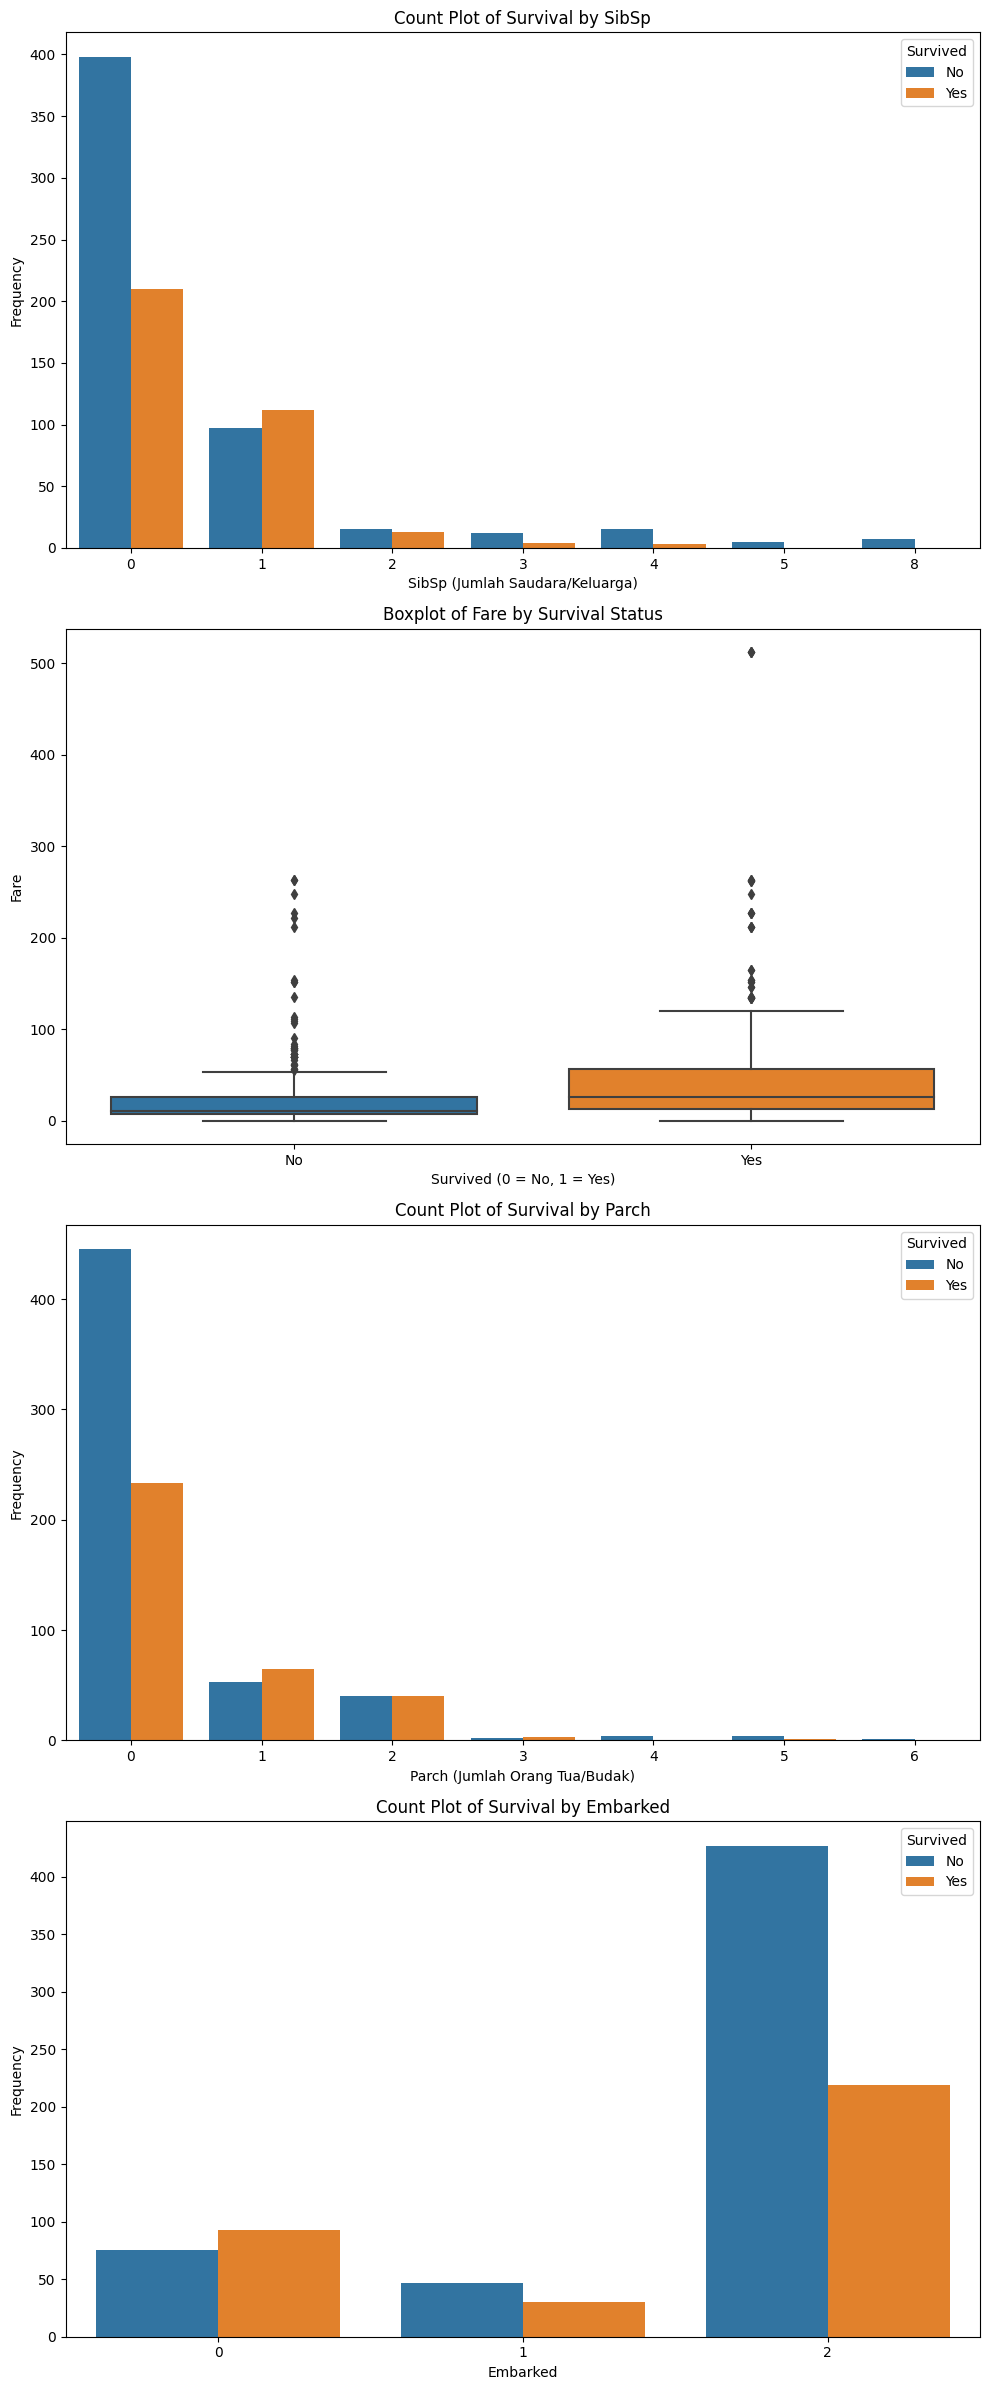

In [80]:
# Mengatur ukuran figure
fig, axs = plt.subplots(4, 1, figsize=(10, 24))

# 1. Countplot untuk Survived vs SibSp
sns.countplot(x='SibSp', hue='Survived', data=data, ax=axs[0])
axs[0].set_xlabel('SibSp (Jumlah Saudara/Keluarga)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Count Plot of Survival by SibSp')
axs[0].legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

# 2. Boxplot untuk Survived vs Fare
sns.boxplot(x='Survived', y='Fare', data=data, ax=axs[1])
axs[1].set_xlabel('Survived (0 = No, 1 = Yes)')
axs[1].set_ylabel('Fare')
axs[1].set_title('Boxplot of Fare by Survival Status')
axs[1].set_xticklabels(['No', 'Yes'])

# 3. Countplot untuk Survived vs Parch
sns.countplot(x='Parch', hue='Survived', data=data, ax=axs[2])
axs[2].set_xlabel('Parch (Jumlah Orang Tua/Budak)')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Count Plot of Survival by Parch')
axs[2].legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

# 4. Countplot untuk Survived vs Embarked
sns.countplot(x='Embarked', hue='Survived', data=data, ax=axs[3])
axs[3].set_xlabel('Embarked')
axs[3].set_ylabel('Frequency')
axs[3].set_title('Count Plot of Survival by Embarked')
axs[3].legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


Dari hasil visualisasi 3 variabel yaitu SibSp, Fare, Parch, dan Embarked terhadap Survived didapat hasil analisis sebagai berikut:
1. Pada bagian SibSp-Survived, jumlah penumpang tidak selamat paling banyak adalah keadaan di mana penumpang tidak membawa/mengajak saudara/pasangan ke dalam kapal. Begitu juga pada jumlah penumpang yang selamat paling banyakl adalah keadaan di mana penumpang tidak membawa/mengajak saudara/pasangan ke dalam kapal. Hanya di keadaan di mana penumpang hanya mengajak 1 saudara/pasangan ke dalam kapal yang memiliki jumlah penumpang selamat daripada yang tidak selamat, untuk yang membawa 2-8 saudara/penumpang ke dalam kapal, jumlah penumpang tidak selamat lebih banyak daripad yang selamat sama seperti keadaan penumpang yang tidak mengajak siapapun.
2. Di bagian Fare-Survived, dari sisi rentang IQR, maximum (Q3-1.5 * IQR), dan minimum (Q1 - 1.5 * IQR) dari kedua boxplot dapat dilihat bahwa boxplot orang yang selamat memiliki rentang yang lebih luas artinya penumpang yang membayar sedikit lebih mahal pada tiket Titanic itu memiliki chance untuk selamat lebih besar. Pada bagian outlier, kedua boxplot relatif memiliki jumlah outliers yang sama.
3. Pada bagian Parch-Survived, jumlah penumpang tidak selamat paling banyak adalah keadaan di mana penumpang tidak mengajak orangtua/anak-anak ke dalam kapal. Begitu juga pada jumlah penumpang yang selamat paling banyak adalah keadaan di mana penumpang tidak mengajak orangtua/anak-anak ke dalam kapal. Hanya di keadaan di mana penumpang hanya mengajak 1 orangtua/anak-anak ke dalam kapal yang memiliki jumlah penumpang selamat daripada yang tidak selamat, untuk yang membawa 2-6 orangtua/anak-anak ke dalam kapal, jumlah penumpang tidak selamat lebih banyak daripada yang selamat sama seperti keadaan penumpang yang tidak mengajak siapapun.
4. Di bagian Embarked-Surived, jumlah penumpang yang baik selamat ataupun tidak selamat paling banyak adalah yang memiliki daerah asal Southampton. Hanya daerah asal Cherbourg di mana jumlah penumpang yang selamat lebih banyak daripada yang tidak selamat, untuk yang berasal dari Queenstown dan Southampton memiliki jumlah penumpang yang tidak selamat lebih banyak dari yang selamat.

Insights yang perlu diberikan adalah sebagai berikut:
1. Dari hasil analisis di atas dapat dilihat bahwa jumlah penumpang yang tidak mengajak siapapun memiliki lebih banyak penumpang yang tidak selamat daripada yang selamat. Hal ini bisa disebabkan karena penumpang yang membawa saudara/pasangan ke dalam kapal, mereka juga mengajak perempuan ke dalam kapal di mana pada bagian sebelumnya telah dibahas bahwa lebih banyak pria yang tidak selamat daripada yang perempuan. Masukan yang dapat diberikan adalah hampir sama seperti pada bagian sebelumnya (Sex-Survived) yaitu memberikan pelayanan/keselamatan yang lebih merata.
2. Ditinjau dari hasil analisis sebelumnya bahwa seseorang yang membayar tiket lebih mahal memiliki chance selamat lebih tinggi daripada yang membayar lebih murah. Ini dapat disebabkan karena penumpang yang membayar tiket lebih mahal mendapat prioritas yang lebih utama daripada yang lain. Masukan yang dapat diberikan adalah memberikan pelayanan yang yang lebih proper kepaad yang membayar tiket lebih murah dengan tetap memperhatikan kesenjangan pelayanan antara yang membayar lebih murah dan lebih mahal.
3. Dari hasil analisis di atas dapat dilihat bahwa jumlah penumpang yang tidak mengajak siapapun memiliki lebih banyak penumpang yang tidak selamat daripada yang selamat. Hal ini bisa disebabkan karena penumpang yang membawa saudara/pasangan ke dalam kapal, mereka juga mengajak perempuan atau lansia atau anak-anak ke dalam kapal di mana pada bagian sebelumnya telah dibahas bahwa lebih banyak pria yang tidak selamat daripada yang perempuan. Ini juga disebabkan bahwa anak-anak dan lansia adalah prioritas yang lebih utama daripada usia yang lain. Masukan yang dapat diberikan adalah hampir sama seperti pada bagian sebelumnya (Sex-Survived) yaitu memberikan pelayanan/keselamatan yang lebih merata.
4. Pada analisis sebelumnya, jumlah penumpang dengan daerah asal Southampton jauh lebih banyak yang tidak selamat daripada yang selamat. Ini mungkin mengindikasikan bahwa mayoritas penumpang asal Southampton adalah pria sama seperti yang telah dibahas pada bagian Sex-Survived di mana pria jauh lebih banyak yang tidak selamat daripada yang perempuan. Masukan yang dapat diberikan adalah hampir sama seperti pada bagian sebelumnya (Sex-Survived) yaitu memberikan pelayanan/keselamatan yang lebih merata.



# Modeling

## Feature Selection

In [28]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [29]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [30]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Train Test Split, Memisahkan data untuk dilatih dan diuji

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data train

In [32]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [33]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

### Data test

In [34]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [35]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

## Classification Model Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- n_estimators menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators=100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berbeda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.
- random_state adalah angka yang digunakan untuk mengatur "benih" acak (random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsisten. Misalnya, setiap kali kita menjalankan kode dengan random_state=42, hasilnya akan sama.

## Classification Models LogReg, KNN, SVM, Gradient Boosting, Decision Tree & Naive Bayes

In [37]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Model Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Model Support Vector Machine
svc_model = SVC(probability=True) 
svc_model.fit(X_train, y_train)

# Model Gradient Boosting
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

1. Logistic Regression adalah model statistik yang digunakan untuk prediksi klasifikasi. Ini mengestimasi probabilitas bahwa suatu input termasuk dalam kelas tertentu dengan menggunakan fungsi logistik.
- max_iter adalah jumlah iterasi maksimum yang akan dilakukan selama proses pelatihan. Jika model belum konvergen dalam jumlah iterasi yang ditentukan, pelatihan akan dihentikan. Penetapan max_iter yang tinggi (seperti 1000) membantu memastikan bahwa model memiliki cukup waktu untuk konvergen, terutama untuk dataset yang lebih kompleks.
2. K-Nearest Neighbors (KNN) adalah algoritma klasifikasi yang memprediksi kelas dari suatu data berdasarkan kelas dari k tetangga terdekatnya.
- n_neighbors adalah jumlah tetangga terdekat yang akan dipertimbangkan saat membuat prediksi. Dalam hal ini, jika n_neighbors diatur ke 5, model akan melihat 5 data terdekat untuk menentukan kelas.
3. Support Vector Machine (SVM) adalah model klasifikasi yang bekerja dengan mencari hyperplane optimal yang memisahkan kelas-kelas dalam data.
- Probability=True memungkinkan model untuk memperkirakan probabilitas prediksi. Secara default, SVM tidak memberikan probabilitas, tetapi dengan mengatur parameter ini, kita bisa mendapatkan estimasi probabilitas untuk kelas yang diprediksi.
4. Gradient Boosting adalah teknik ensemble yang menggabungkan beberapa model lemah (biasanya decision trees) untuk membentuk model yang lebih kuat. Ini bekerja dengan membangun model baru yang mengoreksi kesalahan dari model sebelumnya secara iteratif.
5. Decision Tree adalah model klasifikasi yang menggunakan struktur pohon untuk membuat keputusan berdasarkan atribut input. Setiap cabang mewakili keputusan berdasarkan nilai atribut, dan setiap daun mewakili kelas akhir.
- random_state digunakan untuk memastikan bahwa pembagian data dan pemilihan atribut acak dilakukan dengan cara yang sama setiap kali kode dijalankan, sehingga hasil tetap konsisten.
6. Naive Bayes adalah sekumpulan algoritma klasifikasi berbasis probabilitas yang menggunakan teorema Bayes dengan asumsi independensi antara fitur.
- GaussianNB digunakan untuk data yang diasumsikan berdistribusi normal (Gaussian). Model ini sangat efisien dan cepat dalam klasifikasi, terutama untuk dataset besar.

# Evaluation (Prediction)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Random Forest Prediction

In [39]:
y_pred = model.predict(X_test)

In [40]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


## Logistic Regression Prediction

In [41]:
y_pred_logreg = logreg_model.predict(X_test)

In [42]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_logreg
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


## K-Nearest Neighbor (KNN) Prediction

In [43]:
y_pred_knn = knn_model.predict(X_test)

In [44]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_knn
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,0
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,0


## Support Vector Machine (SVM) Prediction

In [45]:
y_pred_svc = svc_model.predict(X_test)

In [46]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_svc
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,0
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,0


## Gradient Boosting Prediction

In [47]:
y_pred_gbc = gbc_model.predict(X_test)

In [48]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_gbc
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


## Decision Tree Prediction

In [49]:
y_pred_dt = dt_model.predict(X_test)

In [50]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_dt
})
df_comparison

,Actual,Predicted
709,1,0
439,0,1
840,0,1
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


## Naive Bayes Prediction

In [51]:
y_pred_nb = nb_model.predict(X_test)

In [52]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_nb
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


# Evaluation (Confusion Matrix)

## Random Forest Confusion Matrix

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[92 13]
 [19 55]]


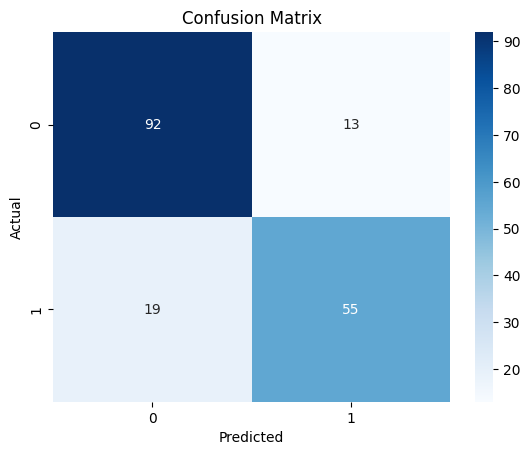

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression Confusion Matrix

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[90 15]
 [19 55]]


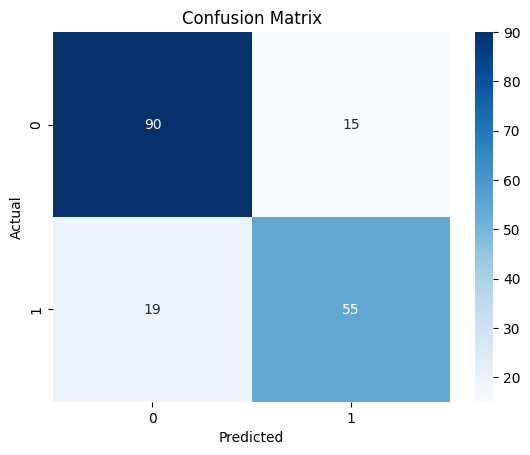

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## K-Nearest Neighbor Confusion Matrix

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[87 18]
 [35 39]]


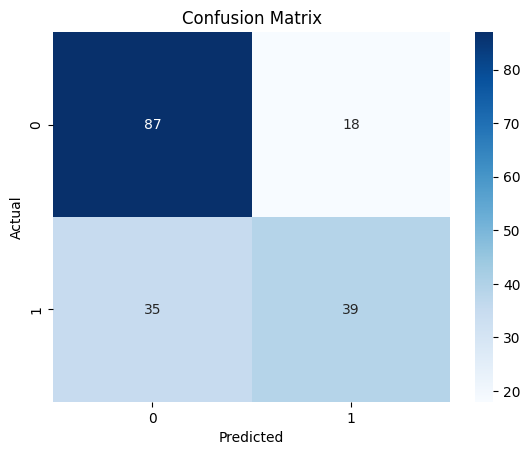

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine (SVM) Confusion Matrix

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[99  6]
 [55 19]]


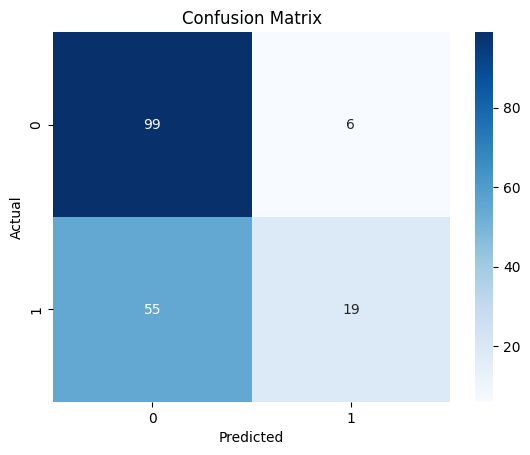

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Gradient Boosting Confusion Matrix

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred_gbc)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[93 12]
 [22 52]]


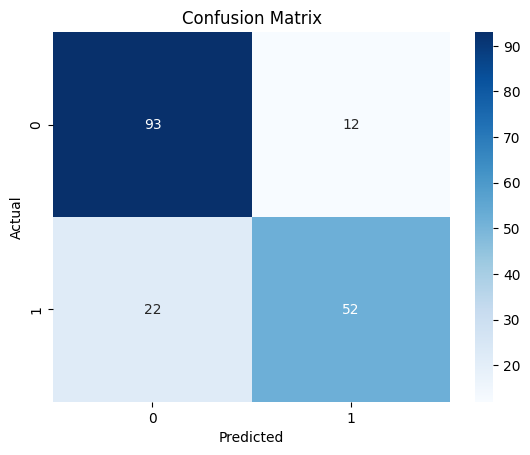

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Confusion Matrix

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[83 22]
 [17 57]]


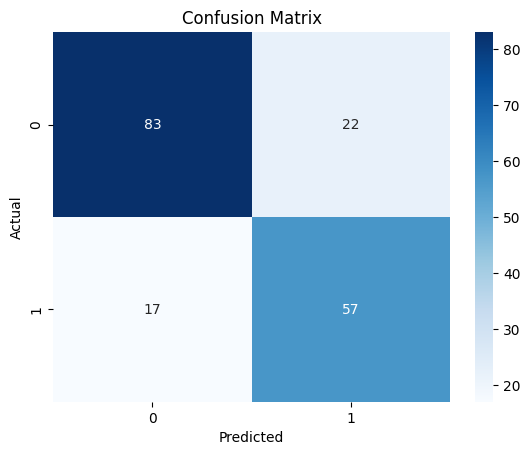

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes Confusion Matrix

In [65]:
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[82 23]
 [17 57]]


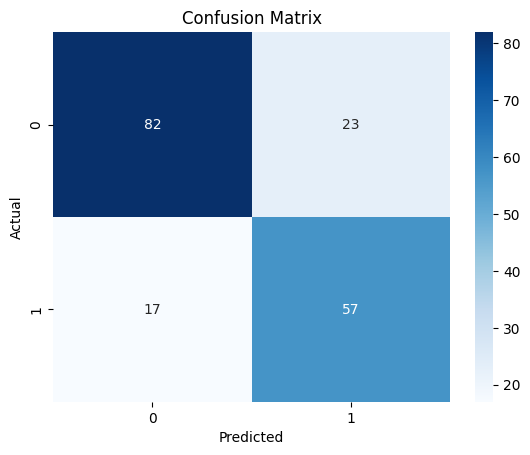

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Accuration of Model from Prediction

In [67]:
import pandas as pd
from sklearn.metrics import accuracy_score

# List model names and predictions
model_names = ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 
               'Gradient Boosting', 'Decision Tree', 'Naive Bayes']
predictions = [y_pred, y_pred_logreg, y_pred_knn, y_pred_svc, y_pred_gbc, y_pred_dt, y_pred_nb]

# Dictionary to store model accuracy
accuracy_dict = {}

# Calculate accuracy for each model
for model_name, y_pred in zip(model_names, predictions):
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[model_name] = accuracy

# Convert dictionary to DataFrame
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy (descending order)
accuracy_df_sorted = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Set index to start from 1
accuracy_df_sorted.index += 1

# Display the sorted DataFrame with index starting from 1
accuracy_df_sorted


,Model,Accuracy
1,Random Forest,0.821229
2,Logistic Regression,0.810056
3,Gradient Boosting,0.810056
4,Decision Tree,0.782123
5,Naive Bayes,0.776536
6,K-Nearest Neighbors,0.703911
7,Support Vector Machine,0.659218


Dari hasil pemodelan di atas didapat bahwa model Random Forest memiliki akurasi terbaik dibandingkan model lain sehingga model terbaik untuk memodelkan dataset Titanic ini adalah Random Forest.

# Further Analysis

## Feature Importances in Random Forest, Gradient Boosting & Decision Tree

In [68]:
# Daftar model yang mendukung feature importance
model_names = ['Random Forest', 'Gradient Boosting', 'Decision Tree']
models = [model, gbc_model, dt_model]  # Ganti dengan model yang sudah di-fit

# Mendapatkan feature names (misalnya, dari X_train)
feature_names = X_train.columns

# Membuat dataframe untuk menyimpan feature importance dari semua model
df_feature_importance = pd.DataFrame({'Feature': feature_names})

# Menambahkan kolom feature importance untuk setiap model
for model, model_name in zip(models, model_names):
    feature_importance = model.feature_importances_  # Mendapatkan feature importances dari model
    df_feature_importance[model_name] = feature_importance

# Mengurutkan dataframe berdasarkan feature importance dari setiap model (menambahkan kolom yang diurutkan)
for model_name in model_names:
    df_feature_importance = df_feature_importance.sort_values(by=model_name, ascending=False)

# Mengatur indeks mulai dari 1
df_feature_importance = df_feature_importance.reset_index(drop=True)
df_feature_importance.index += 1

# Menampilkan dataframe yang sudah diurutkan berdasarkan feature importance dari setiap model
df_feature_importance


,Feature,Random Forest,Gradient Boosting,Decision Tree
1,Sex,0.271410,0.471704,0.310280
2,Fare,0.265010,0.163565,0.242798
3,Age,0.249995,0.131644,0.217041
4,Pclass,0.086957,0.153127,0.111619
5,SibSp,0.053685,0.055085,0.056342
6,Parch,0.039897,0.006312,0.037738
7,Embarked,0.033044,0.018563,0.024181


In [69]:
import pandas as pd

# Daftar model yang mendukung feature importance
model_names = ['Random Forest', 'Gradient Boosting', 'Decision Tree']
models = [model, gbc_model, dt_model]  # Ganti dengan model yang sudah di-fit

# Mendapatkan feature names (misalnya, dari X_train)
feature_names = X_train.columns

# Membuat dataframe untuk menyimpan feature importance dari semua model
df_feature_importance = pd.DataFrame({'Feature': feature_names})

# Menambahkan kolom feature importance untuk setiap model
for model, model_name in zip(models, model_names):
    feature_importance = model.feature_importances_  # Mendapatkan feature importances dari model
    df_feature_importance[model_name] = feature_importance

# Tabel pertama: diurutkan sesuai dengan Random Forest dan indeks dimulai dari 1
df_feature_importance_no_sort = df_feature_importance.copy()

# Mengurutkan berdasarkan Random Forest
df_feature_importance_no_sort = df_feature_importance_no_sort.sort_values(by='Random Forest', ascending=False)

# Mengatur indeks mulai dari 1
df_feature_importance_no_sort = df_feature_importance_no_sort.reset_index(drop=True)
df_feature_importance_no_sort.index += 1

# Tabel ketiga: ranking berdasarkan importance
df_feature_importance_rank = df_feature_importance_no_sort.copy()  # Mulai dari Tabel 1 yang sudah diurutkan

# Mengganti nilai importance dengan ranking untuk setiap model
for model_name in model_names:
    # Urutkan berdasarkan importance dan berikan ranking (1 untuk yang paling tinggi)
    df_feature_importance_rank[model_name] = df_feature_importance_rank[model_name].rank(ascending=False).astype(int)

# Mengatur indeks mulai dari 1 untuk tabel yang sudah diberi ranking
df_feature_importance_rank = df_feature_importance_rank.reset_index(drop=True)
df_feature_importance_rank.index += 1

# Menampilkan tabel pertama yang sudah diurutkan sesuai Random Forest dengan indeks mulai dari 1
print("Tabel 1: Feature Importance diurutkan berdasarkan Random Forest")
print(df_feature_importance_no_sort)

# Menampilkan tabel ketiga (ranking berdasarkan importance di tiap model, mengikuti urutan Random Forest)
print("\nTabel 2: Ranking berdasarkan feature importance mengikuti urutan Random Forest")
print(df_feature_importance_rank)


Tabel 1: Feature Importance diurutkan berdasarkan Random Forest
    Feature  Random Forest  Gradient Boosting  Decision Tree
1       Sex       0.310280           0.471704       0.310280
2      Fare       0.242798           0.163565       0.242798
3       Age       0.217041           0.131644       0.217041
4    Pclass       0.111619           0.153127       0.111619
5     SibSp       0.056342           0.055085       0.056342
6     Parch       0.037738           0.006312       0.037738
7  Embarked       0.024181           0.018563       0.024181

Tabel 2: Ranking berdasarkan feature importance mengikuti urutan Random Forest
    Feature  Random Forest  Gradient Boosting  Decision Tree
1       Sex              1                  1              1
2      Fare              2                  2              2
3       Age              3                  4              3
4    Pclass              4                  3              4
5     SibSp              5                  5              5
6 

In [70]:
coefficients = logreg_model.coef_[0]

# Membuat dataframe untuk menyimpan fitur dan koefisien
df_logreg_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Mengurutkan dataframe berdasarkan koefisien dari yang tertinggi ke terendah
df_logreg_importance = df_logreg_importance.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Mengatur indeks mulai dari 1
df_logreg_importance.index += 1

# Menampilkan dataframe yang sudah diurutkan
print("Fitur dan koefisien dari Logistic Regression:")
print(df_logreg_importance)

Fitur dan koefisien dari Logistic Regression:
    Feature  Coefficient
1      Fare     0.002533
2       Age    -0.030430
3     Parch    -0.111821
4  Embarked    -0.218848
5     SibSp    -0.293865
6    Pclass    -0.930727
7       Sex    -2.596709
